<a href="https://colab.research.google.com/github/MrNoby47/Deep_learning/blob/main/training_model_update.II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [204]:
np.random.seed(0)


In [205]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train[:10])

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]


In [206]:
assert(X_train.shape[0] == y_train.shape[0]), 'number of images is different to labels'
assert(X_test.shape[0] == y_test.shape[0]), 'number of images is different to labels'
assert(X_train.shape[1:] == (28,28)),'images sizes are not 28*28'
assert(X_test.shape[1:] == (28,28)),'images sizes are not 28*28'

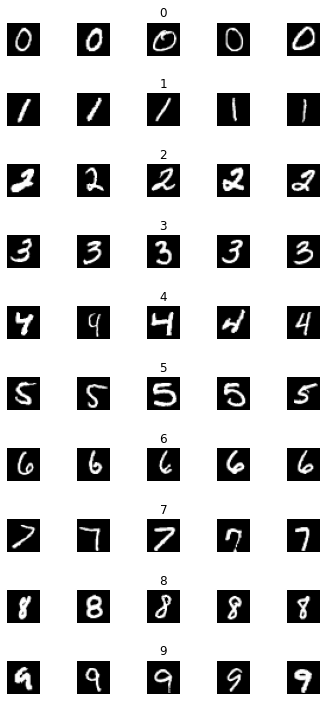

In [207]:
#let's load now the image training from MNIST
num_samples = [] #to count elements number from each class

cols = 5
n_classe = 10
fig,axs = plt.subplots(nrows=n_classe, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
  for j in range(n_classe):
    x_selected = X_train[y_train == j ]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected) - 1),:,:],cmap =plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_samples.append(len(x_selected))

Text(0, 0.5, 'Number of images')

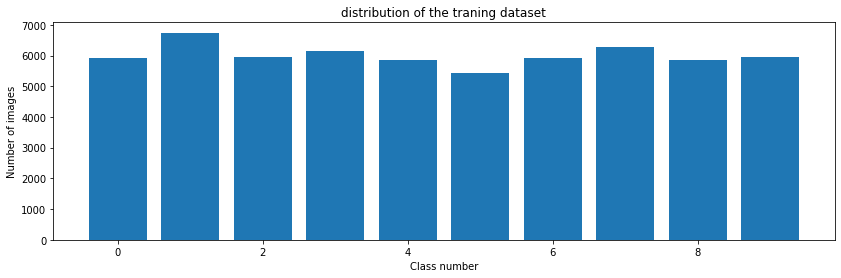

In [208]:
#plot our distribution dataset
plt.figure(figsize=(14,4))
plt.bar(range(0, n_classe), num_samples )
plt.title("distribution of the traning dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [209]:
#Now let's prepare our data for the future Network

#One hot encoding with to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test, 10)

#Normalization for the input layer
 
X_train = X_train/255
X_test = X_test/255

#reshape images size for weights matrix

num_pixels = 784 #28*28 = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test =X_test.reshape(X_test.shape[0], num_pixels)

In [210]:
#creat the model 

def creat_model():
    model = Sequential()
    model.add(Dense(units= 10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(n_classe, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [211]:
model = creat_model()
#print(model.summary())

#train our model 
h = model.fit(x= X_train, y =y_train,validation_split = 0.1, verbose=1, batch_size=250, epochs=8, shuffle = 1)

Epoch 1/8
216/216 [==============================] - 2s 7ms/step - loss: 0.6406 - accuracy: 0.8009 - val_loss: 0.2758 - val_accuracy: 0.9190
Epoch 2/8
216/216 [==============================] - 1s 4ms/step - loss: 0.3197 - accuracy: 0.9079 - val_loss: 0.2464 - val_accuracy: 0.9297
Epoch 3/8
216/216 [==============================] - 1s 4ms/step - loss: 0.2867 - accuracy: 0.9176 - val_loss: 0.2242 - val_accuracy: 0.9350
Epoch 4/8
216/216 [==============================] - 1s 3ms/step - loss: 0.2692 - accuracy: 0.9219 - val_loss: 0.2413 - val_accuracy: 0.9288
Epoch 5/8
216/216 [==============================] - 1s 4ms/step - loss: 0.2609 - accuracy: 0.9243 - val_loss: 0.2109 - val_accuracy: 0.9395
Epoch 6/8
216/216 [==============================] - 1s 4ms/step - loss: 0.2534 - accuracy: 0.9269 - val_loss: 0.2163 - val_accuracy: 0.9358
Epoch 7/8
216/216 [==============================] - 1s 3ms/step - loss: 0.2463 - accuracy: 0.9293 - val_loss: 0.2173 - val_accuracy: 0.9352
Epoch 8/8
216

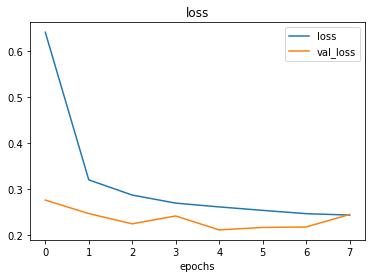

In [212]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.legend(['loss','val_loss'])

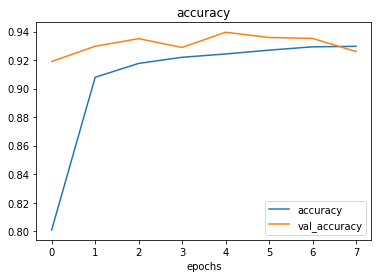

In [213]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.legend(['accuracy','val_accuracy'])

In [214]:
#final test evaluation 
score = model.evaluate(X_test, y_test, verbose=0)
print("Test score :", score[0])
print("Test accuracy :", score[1])

Test score : 0.2711634635925293
Test accuracy : 0.9230999946594238
